# EfficientDet: Scalable and Efficient Object Detection

Implementación en PyTorch del algoritmo EfficientDet para detección de objetos. En particular se entreno el modelo para el reconocimiento de tres clases (Stationery):
* Pens and Pencils.
* Scissors.
* Notebook.

**Autor:**  M. en C. Mario Xavier Canche Uc, Septiembre 2020, *mario.canche@cimat.mx*  
**Basado en:** https://arxiv.org/pdf/1911.09070.pdf 

**Material de referencia:**
- https://towardsdatascience.com/a-thorough-breakdown-of-efficientdet-for-object-detection-dc6a15788b73
- https://blog.roboflow.com/training-efficientdet-object-detection-model-with-a-custom-dataset/
- https://colab.research.google.com/drive/1ZmbeTro4SqT7h_TfW63MLdqbrCUk_1br#scrollTo=KwDS9qqBbMQa

## Cargamos las librerias

In [1]:
import os
import sys
import json

import fnmatch
from IPython.display import Image

## Instalamos paquetes adiccionales

In [2]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [3]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

ERROR: Could not find a version that satisfies the requirement mxnet-cu100 (from versions: none)
ERROR: No matching distribution found for mxnet-cu100
  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47866 sha256=46dcc4300779ec2d7e5536135e3037cc81062259cd912ff079c6d30c6983bbc6
  Stored in directory: /private/var/folders/mp/7mf00n814jxb3jmmfrk96yy80000gn/T/pip-ephem-wheel-cache-ajslgva0/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Users/xaviercanche/anaconda3/lib/python3.7/site-packages/tqdm-4.36.1.dist-info/RECORD'
Consider using the `--user` option or check the permissions.



## Cargamos los datos

In [4]:
# Descargamos los datos de validacion
!curl -L "https://app.roboflow.com/ds/GbodGWeu1j?key=BzZLB6tLMs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [5]:
#extract class list from our annotations
#in your application you will probably already have this saved
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [6]:
class_list

['Scissors-Pencils-Notebook', 'Notebook', 'Pens & Pencils', 'Scissors']

## Cargamos el modelo

In [7]:
# Cambiamos de directorio
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

from infer_detector import Infer

# Instanciamos la Red
gtf = Infer();

In [8]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained")

## Testing

test/IMG_20200918_124332_jpg.rf.213d42e54b9167ae1cb30c588150e740.jpg
Done. (0.917s)


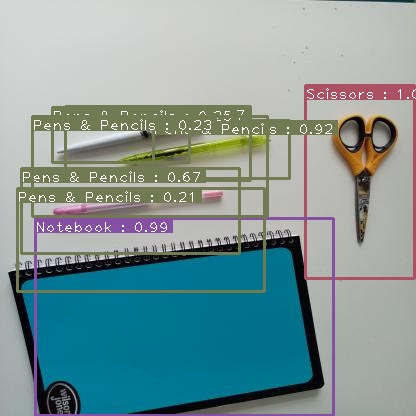

test/IMG_20200918_123703_jpg.rf.50a00292da854114c0225374873c7cd7.jpg
Done. (0.841s)


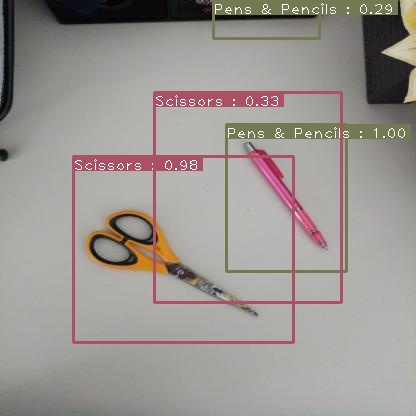

test/IMG_20200918_124325_jpg.rf.784a2ce6f8d007d2401e687dafbc92f4.jpg
Done. (0.855s)


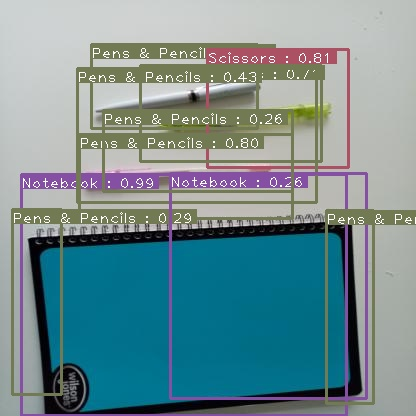

test/IMG_20200918_125530_jpg.rf.bfa1d654e4e3613d75f1766a87fbad97.jpg
Done. (0.944s)


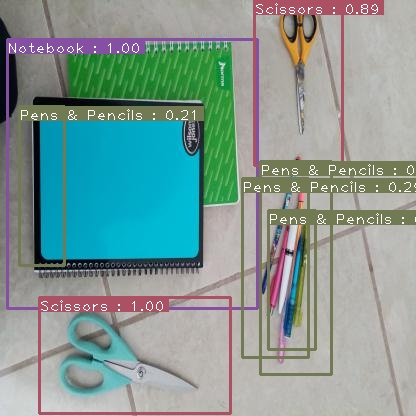

test/IMG_20200918_124707_jpg.rf.8596a08198bb3c639bbbba670cceb50d.jpg
Done. (0.917s)


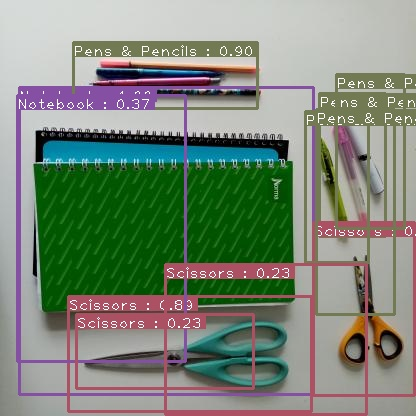

test/IMG_20200918_125342_jpg.rf.08d0ab92cc80f2a97851bd7b93295bc4.jpg
Done. (0.959s)


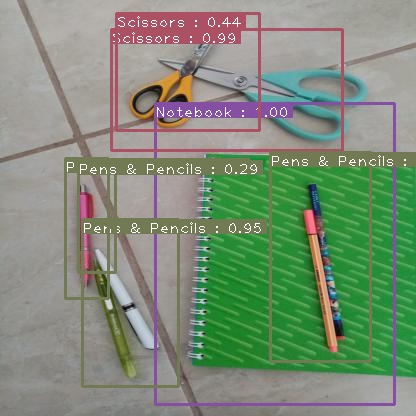

test/IMG_20200918_125202_jpg.rf.89c1471af952f72ce6d016efb6b7ad12.jpg
Done. (0.895s)


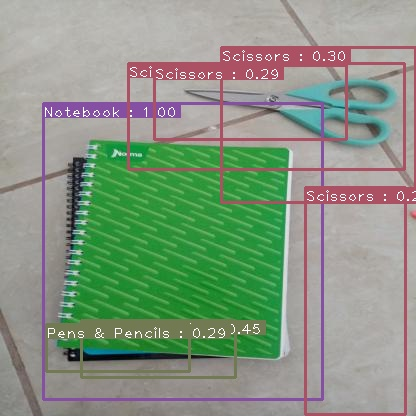

test/IMG_20200918_125207_jpg.rf.a13bfeea270544c73786ebf0abdb597c.jpg
Done. (0.893s)


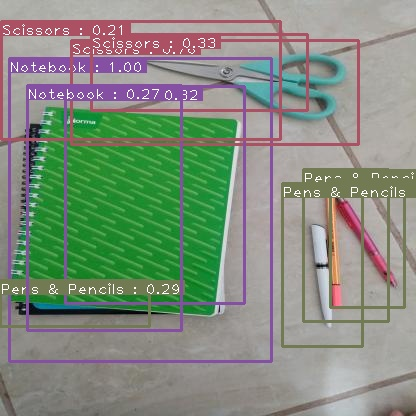

test/IMG_20200918_124346_jpg.rf.2273d2e4120364bf1419831eb5c2d07d.jpg
Done. (0.961s)


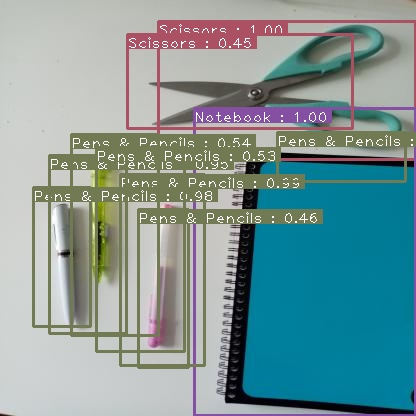

test/IMG_20200918_125228_jpg.rf.0be1c15998c02b9833c910fec59c5b73.jpg
Done. (0.903s)


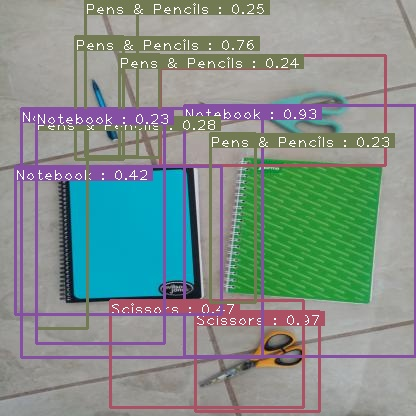

test/IMG_20200918_124612_jpg.rf.e9a32afa0b331697b04053caca6652cd.jpg
Done. (0.932s)


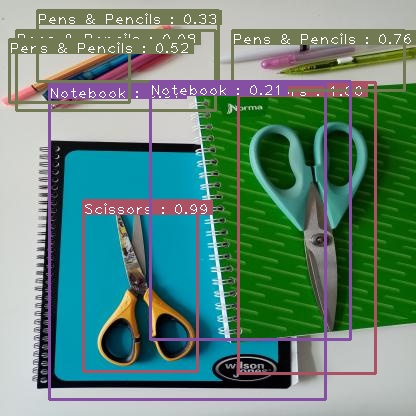

test/IMG_20200918_125150_jpg.rf.bbeb72fe79074b96788bd51221be759d.jpg
Done. (0.907s)


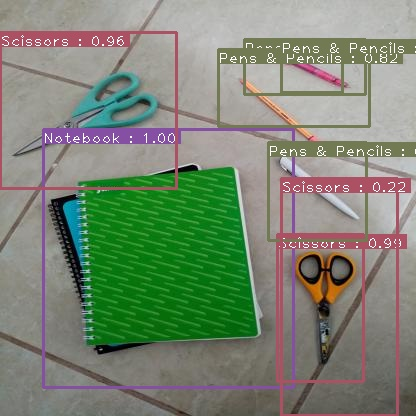

test/IMG_20200918_124058_jpg.rf.254b957c8cd2cf3a0f87035fc1a0e971.jpg
Done. (1.008s)


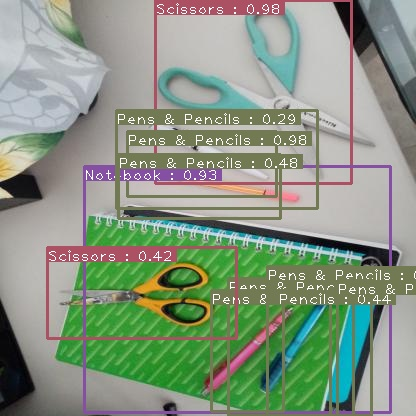

test/IMG_20200918_124008_jpg.rf.16e651783c809d4161de73c92cc9fbe3.jpg
Done. (1.119s)


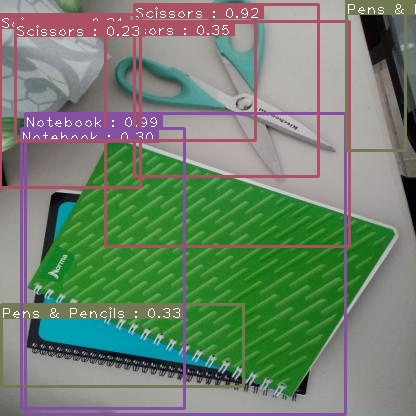

test/IMG_20200918_124047_jpg.rf.266c7be092c48fc26d676c5fe9410333.jpg
Done. (1.066s)


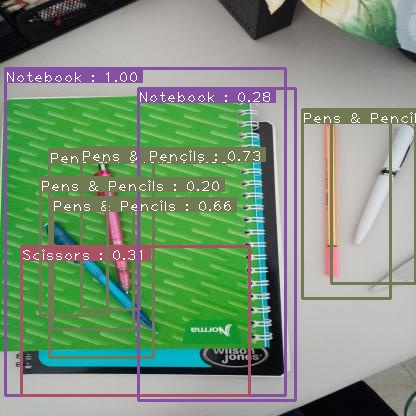

In [9]:
# Directorio con las imagenes de Test
path_dir = "test/"

# Procesamos cada imagen
for img_path in os.listdir("test/"):
  if fnmatch.fnmatch(img_path, "*.jpg"):
    print(path_dir+img_path)
    duration, scores, labels, boxes = gtf.Predict(path_dir+img_path, class_list, vis_threshold=0.2);
    im = Image(filename='output.jpg')
    display(im)

Podemos observar que el algoritmo EfficientDet a sido entrenado correctamente con los datos de entrenamiento (Stationery Data). Hemos guardado los pesos y cargado exitosamente para procesar las imagenes de Test para el reconocimiento de los objetos.

Sobre la precisión del reconocimiento, podemos observar algunas fallas en la clasificación y detección de los objetos. Esto se puede deber a la similaridad que existen entre algunas clases (pens y scissors), a la sobreposición de los objetos y a la diversidad de orientaciones (recortes y transformaciones) en las que se pueden encontrar los objetos.

Por ejemplo, en la siguiente imagen se puede observar como una zona vacía fue clasificada como "Scissors". Esto se puede deber a que en los datos de entrenamiento, la tijera era difícil de etiquetarla en un bounding box (por su posición) y una gran cantidad del fondo quedaba dentro del cuadro.

Done. (1.095s)


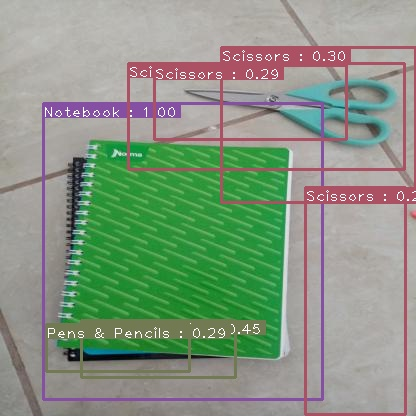

In [10]:
archivo = "test/IMG_20200918_125202_jpg.rf.89c1471af952f72ce6d016efb6b7ad12.jpg"
duration, scores, labels, boxes = gtf.Predict(archivo, class_list, vis_threshold=0.2);
im = Image(filename='output.jpg')
display(im)

Otro, problema común que puede observarse en los datos de test es el reconocimiento de la libreta. En el conjunto de entrenamiento teníamos imagenes con tan solo una porción de la libreta (mitad izquierda), durante el procesamiento de las imágenes de test se puede observar que el algoritmo reconoce la libreta dos veces, en un cuadro completo y en una porción de ella.

Done. (0.905s)


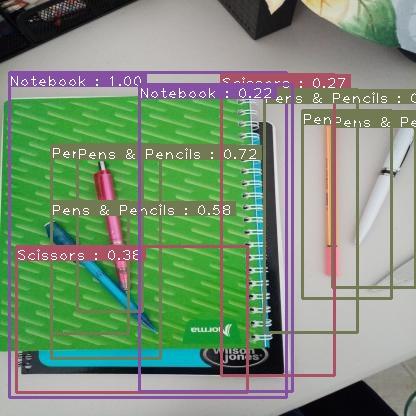

In [15]:
archivo = "test/IMG_20200918_124047_jpg.rf.266c7be092c48fc26d676c5fe9410333.jpg"
duration, scores, labels, boxes = gtf.Predict(archivo, class_list, vis_threshold=0.2);
im = Image(filename='output.jpg')
display(im)